# KMeansClustering

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset.
It's function is to divide a set of data into subgroups (clusters) based on their similarities.
K stands for the number of clustors, which is the argument of this model. It needs to be specified while training the model on the given dataset.

Following is the practical example for execution of KMeansClustering Model



### Hands-On Application of KMeansClustering on Iris Dataset

Step 1- Import the required libraries

In [40]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

Step 2- Load Iris dataset

In [41]:
iris = load_iris()

Step 3- Setting up data into Pandas Dataframe

In [42]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Step 4- Selectiojn of input data

In [44]:
# for simplicity, I am going to keep the petal_length and petal_width and drop out the remaining features
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Step 5- Make a scatter plot for initial k value

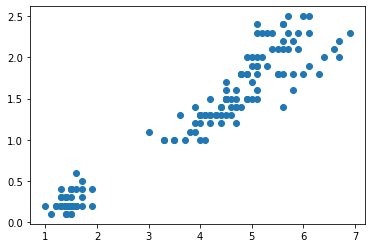

In [59]:
# how to choose k value initially
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])

- From the above scatter plot we can choose either  k = 2 or k = 3

Step 6- Training the Model and Predicting

In [45]:
model = KMeans(n_clusters=3)
y_pred = model.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
df["cluster"] = y_pred
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [47]:
df.cluster.unique()

array([0, 2, 1])

In [48]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

Step 7- Visualization of clusters

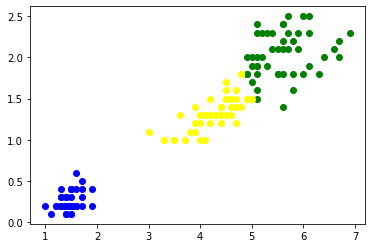

In [49]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

In [54]:
# centroids of our 3 clusters
model.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

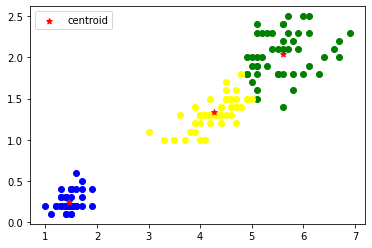

In [55]:
# clusters plot with centroids
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = "red", marker = "*", label = "centroid")
plt.legend()

Step 8- Elbow plot to confirm our k value

In [50]:
# plotting elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

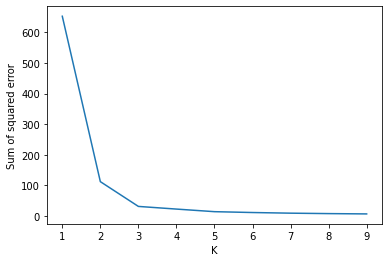

In [51]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [52]:
# the above plot determines that k=3 at the elbow 